<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Logistical_Regression/Logistical_Regression_Multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification using Logistical Regression

## Author

Will McIntosh

## Purpose

To create a logistical regression model.

These are using the [Titanic Dataset](https://www.kaggle.com/c/titanic/data)

In [112]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore Matplotlib warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Get the Datasets
! pip install -p kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download titanic
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p
mkdir: cannot create directory ‘/root/.kaggle’: File exists
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


## Data Exploration

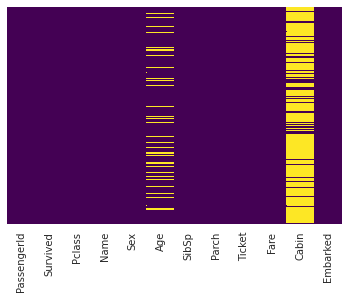

In [114]:
# We're missing some age data and a lot of cabin data
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

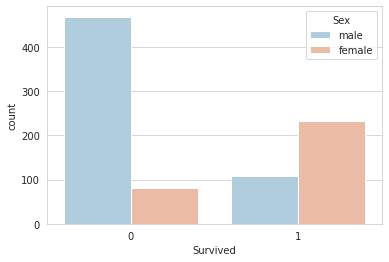

In [115]:
# This shows that most people that died were male
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r')

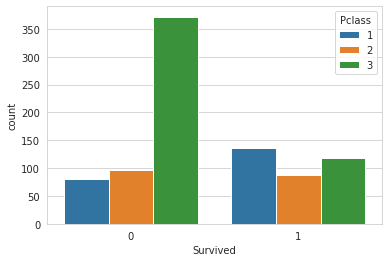

In [116]:
# This shows that most deaths were of the 3rd class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train)

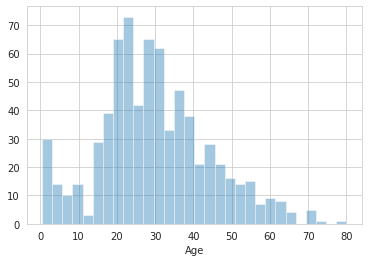

In [117]:
# This shows that most people were in their early 20s
sns.distplot(train['Age'].dropna(), kde=False,bins=30)

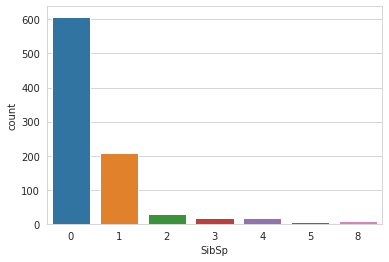

In [118]:
# Most people were single and some had a spouse
sns.countplot(x='SibSp',data=train)

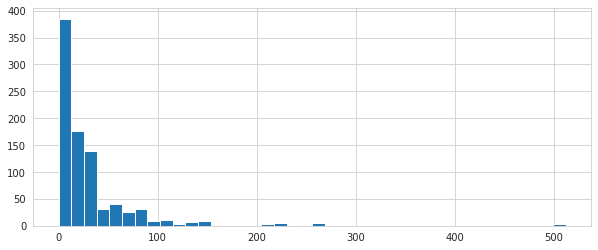

In [119]:
# Most sales people were in the zer0 to 20 range.
train['Fare'].hist(bins=40,figsize=(10,4))

## Impute Missing Ages

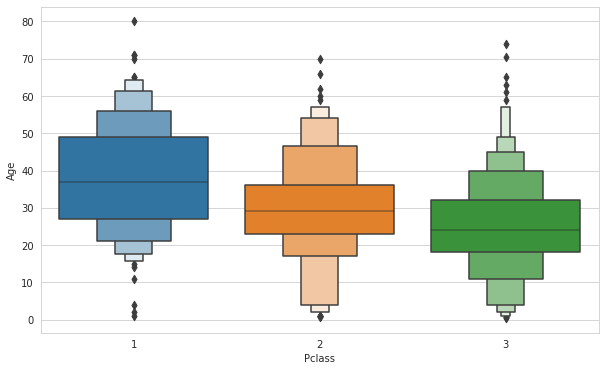

In [120]:
# This shows that the first class is a bit more wealthy
plt.figure(figsize=(10,6))
sns.boxenplot(x='Pclass', y='Age', data=train)

In [121]:
# We can use this to apply a function to fill in our missing ages
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  return Age

In [122]:
# Applies the function imputation for missing ages
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

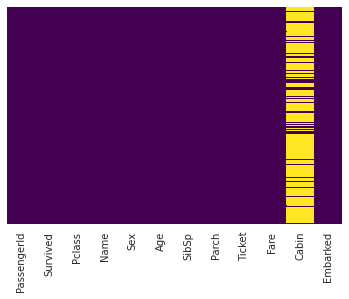

In [123]:
# Shows the new ages being imputed and no longer missing
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [124]:
# Apply the same to the test data
test['Age'] = test[['Age', 'Pclass']].apply(impute_age,axis=1)

## Data Cleanup

In [125]:
# Drop Cabin Columns for both data sets
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Drop Embarked is null rows
train.dropna(inplace=True)
test.dropna(inplace=True)

## Making Dummy Variables

In [126]:
# Make dummy variables from the strings and remove co-linearity
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, sex, embark], axis=1)

# Do the same for the test data
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, sex, embark], axis=1)

In [127]:
# Drop unwanted columns
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

## Logistic Regression Model

In [128]:
#Split train data set
X = train.drop('Survived', axis=1)
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [129]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

## Test Predictions

In [130]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])